In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
iris = load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(12,), , activation='relu', solver='adam', max_iter=300, random_state=42,verbose=False)
mlp.fit(X_train_scaled, y_train)
train_acc = mlp.score(X_train_scaled, y_train)
test_acc = mlp.score(X_test_scaled, y_test)
print(f"Training accuracy: {train_acc:.3f}")
print(f"Testing accuracy: {test_acc:.3f}")

plt.figure(figsize=(6,4))
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

y_pred = mlp.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

SyntaxError: invalid syntax (3661584674.py, line 15)

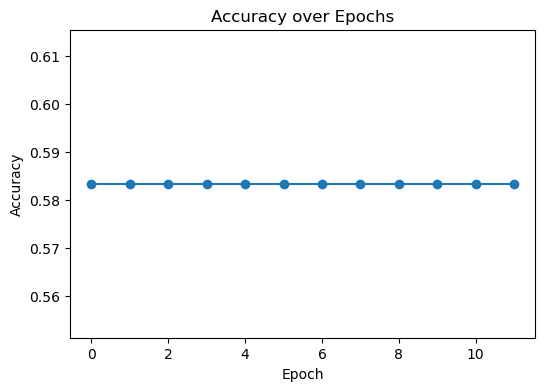

In [29]:
if hasattr(mlp, 'validation_scores_') and mlp.validation_scores_ is not None:
    plt.figure(figsize=(6,4))
    plt.plot(mlp.validation_scores_, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.show()

In [7]:
print(f"Accuracy: {test_acc * 100:.2f}%")

Accuracy: 86.67%
